## Phase 0. Data Gathering

First, let us begin by acquiring the necessary tools for our analysis and importing our dataset.

In [2]:
# Import neccessary libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium

# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

#creating a copy of the dataframe
ds = dinosaurs.copy()


We then proceed to familiarize oursleves with the data while keeping in mind the aim of our analysis (diving into the fossil records to find some interesting insights, and advising the museum on the quality of the data).

During this process, we derive some interesting prompts/questions which could help propel our analysis forward (presented in the _Other Insights_ section).  

In [2]:
#Previewing the dataframe to see and acknowledge content
ds.head(15)

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
5,139253,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.525337,50.740471,Saurischia,Tyrannosauridae
6,139254,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.601021,50.786999,Saurischia,Tyrannosauridae
7,139255,Albertosaurus,carnivorous,large theropod,9.0,72.1,66.00,Alberta,-112.981903,51.804600,Saurischia,Tyrannosauridae
8,139256,Albertosaurus,carnivorous,large theropod,9.0,70.6,66.00,Alberta,-112.981903,51.819099,Saurischia,Tyrannosauridae
9,139257,Albertosaurus,carnivorous,large theropod,9.0,83.5,70.60,Alberta,-112.818901,51.542702,Saurischia,Tyrannosauridae


## Phase 1 - Data Quality Assessment
Data quality assessment is a crucial step in ensuring that our data is fit for use in our specific context

In this phase, we assess the structure and content of our data. We crosscheck for data quality and tidiness issues; beginning with inaccurate data types, missing/incomplete data, duplicate data, inaccurate data, and then subsequently diving into other issues which will be observed as we proceed.

Let us begin this assessment by visualising some statistics about our data

In [3]:
# visualing basic statistics related to our data to see if there are any anomalies or patterns
ds.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,3568.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,8.212688,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,6.629887,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,3.000000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,10.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


After going over the statistics above, the following was noticed:

- The longitude (lng) column seems to have an erroneous entry. Longitudes range from -180 to +180, but our stats show us that there is a max value of 56.5. This has to be documented and addressed.


- Additionally, The lengths (length_m) and ages (max_ma and min_ma) seemed quite far apart to me, which picked my curiosity but after verification, they do not seem to be faulty as their values are realistic and concord with other sources like https://www.dinosaurreport.com/longest-dinosaur/ and https://www.oldest.org/animals/dinosaurs/

Let's move on to crosschecking our data for quality issues, beginning with checking the data types of each column.

### a. Checking for incorrect data types

In [4]:
#inspecting data types
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


The data types seem appropriate for each column. Now we proceed to check for null values.

### b. Checking for null values

In [5]:
#verifying columns with null entries
print(ds.isnull().sum())

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64


There are columns with a lot of null entries, which are the diet, type, length_m, region, and family columns. This brings us to two issues that need correcting/verification: An incorrect longitudeand entries with null values. 

A summary of these issues will be presented again and the end of our assessment.

Let's proceed to check for duplicates.

### c. Checking for duplicates

In [6]:
# Next, we'll check for duplicates based on the 'occurrence_no' column, as it should be unique
duplicate_rows = ds[ds.duplicated(['occurrence_no'])]
duplicate_rows

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


No duplicate entries present. Now let's go ahead and check for odd entries. An odd entry here refers to data that does not reflect the nature of the variable (column) it is classified under.

### d. Checking for odd entries

In [7]:
# Checking for any inconsistencies in categorical data
print(dinosaurs['diet'].value_counts())
print(dinosaurs['type'].value_counts())
print(dinosaurs['class'].value_counts())

herbivorous    2076
carnivorous    1308
omnivorous      212
Name: diet, dtype: int64
ornithopod          811
large theropod      733
small theropod      717
sauropod            665
ceratopsian         363
armored dinosaur    307
Name: type, dtype: int64
Saurischia      3074
Ornithischia    1877
Name: class, dtype: int64


The different categories present in the dataset do seem to reflect the type of data they should be storing.

Now let's continue, by checking for any data inconsistencies

### d. Checking for data consistency

Given the `max_ma` column shows the age in which the first fossil records of the dinosaur were found and the `min_ma` column the last fossil records, the `max_ma` has to be less than the `min_ma`. To ensure our data is consistent, let's verify if all rows respect this norm.

In [8]:
ds[ds['max_ma'] < ds['min_ma']]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


No rows were found to violate the norm, so these columns are consistent. Let us now proceed to summarize the observed data issues thus far.

### Observed Anomalies

1 - Longitudes range from -180 to +180, but here we can observe that there is an entry that has a longitude of 565.

2 - Some columns have null values, i.e., length_m, region, family, type, diet.



## Phase 2 - Data Cleaning

In this section of our analysis, we will address the various data quality issues identified. This will be done using a Fix-Verification paradigm.

In the Fix section, we will write the code that resolves the issues. In the Verification section, we will confirm that our code was successful and achieved the intended results.

### 1. Addressing null values


We will begin by identifying the rows that contain any null values.

In [13]:
# Display rows with at least one null value
ds[ds.isnull().any(axis=1)]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
12,139260,Isisaurus,herbivorous,sauropod,18.0,72.1,66.0,Maharashtra,80.366669,21.183332,Saurischia,NaN
19,139306,Amygdalodon,herbivorous,sauropod,15.0,180.1,171.6,Chubut,-69.516670,-43.966667,Saurischia,NaN
20,139307,Camarasaurus,herbivorous,sauropod,23.0,157.3,145.0,Colorado,-108.638550,39.031395,Saurischia,NaN
21,139308,Camarasaurus,herbivorous,sauropod,23.0,157.3,152.1,Colorado,-108.717499,39.111668,Saurischia,NaN
22,144307,Bistahieversor,NaN,NaN,NaN,83.5,70.6,New Mexico,-107.966393,36.060280,Saurischia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4945,1358696,Othnielosaurus,NaN,NaN,NaN,157.3,145.0,Colorado,-108.995796,39.238300,Ornithischia,NaN
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.4,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.1,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.8,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


The columns containing null entries are of two data types: object and float.

We will replace the null entries with "unknown" for the columns whose data type is object, and the null entries with the mean of the column for the columns whose data type is float. Let us begin with the object columns.

### Fix

In [14]:
# replacing null entries by "unknown" for object columns
ds[['diet', 'type', 'region', 'family']] = ds[['diet', 'type', 'region', 'family']].fillna('unknown')

### Verification

In [15]:
#verifying if operation was successful
ds[ds[['diet', 'type', 'region', 'family']].isnull().any(axis=1)]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


No rows are returned; hence, all null entries have been successfully replaced. We will now proceed to the numeric columns.

### Fix

In [16]:
# Replacing null values in the 'length_m' column with the mean of the column
ds['length_m'].fillna(ds['length_m'].mean(), inplace=True)

### Verification

In [17]:
ds[ds[['length_m']].isnull().any(axis=1)]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family


No rows are returned as well, implying all null values have been filled

### 2. Addresssing columns whose longitude is more than +180 or less than -180

In [18]:
#retrieving column
ds[(ds['lng'] < -180) | (ds['lng'] > 180)]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
3782,518422,Iguanodon,herbivorous,ornithopod,10.0,136.4,122.46,England,565.0,50.865833,Ornithischia,unknown


Given the nature of this data, it would be best to report to and verify with the museum to provide the accurate longitude, as this database was created and is maintained by them.

## Phase 3 - Exploratory Data Analysis

1. How many different dinosaur names are present in the data?

In [19]:
len(ds['name'].value_counts())

1042

#### Answer : 1042

2. Which was the largest dinosaur? What about missing data in the dataset?

In [20]:
(ds[ds.length_m == max(ds.length_m)][["name","length_m"]]) 

,name,length_m
570,Supersaurus,35.0
924,Supersaurus,35.0
1165,Argentinosaurus,35.0
1423,Supersaurus,35.0
1972,Supersaurus,35.0


#### Answer : Supersaurus and Argentinosaurus were the largest dinosaurs

**Question**: What about missing data in the dataset?

**Answer**: For continuous numerical columns, null or missing values were replaced with the mean of the respective column. For columns of type object, missing values were replaced with the term "unknown".

3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...)

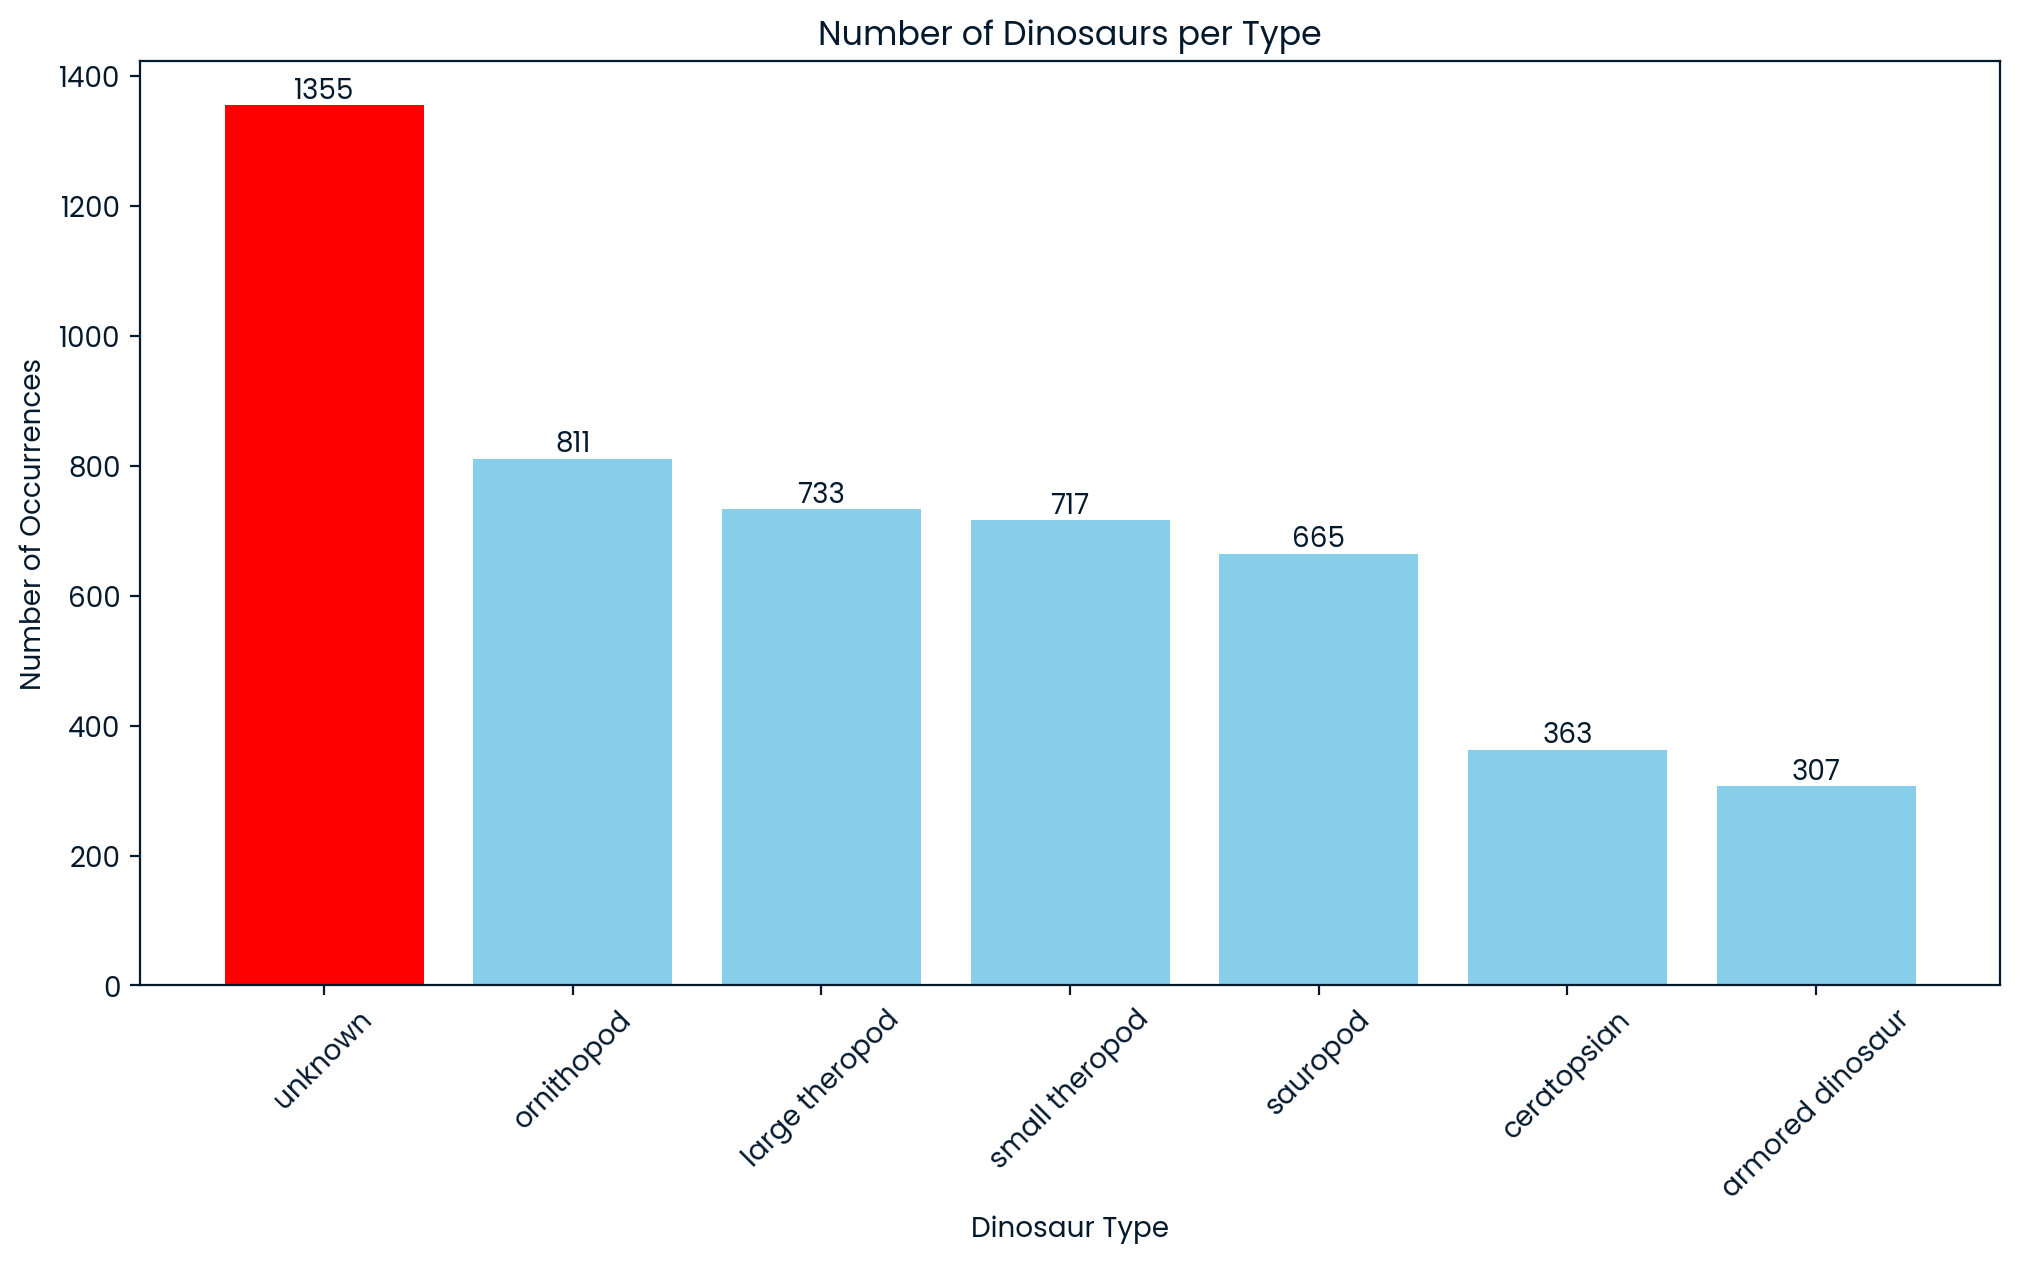

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each dinosaur type
type_counts = ds['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Create a bar chart using only matplotlib
plt.figure(figsize=(12, 6))

# Set colors, making 'unknown' red
colors = ['red' if t == 'unknown' else 'skyblue' for t in type_counts['type']]

bars = plt.bar(type_counts['type'], type_counts['count'], color=colors)

# Add labels and title
plt.xlabel('Dinosaur Type')
plt.ylabel('Number of Occurrences')
plt.title('Number of Dinosaurs per Type')
plt.xticks(rotation=45)

# Add count labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

**Answer** : Ornithopod have the most occurences, given that "unknown" doesn't describe a dinosaur type

4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.

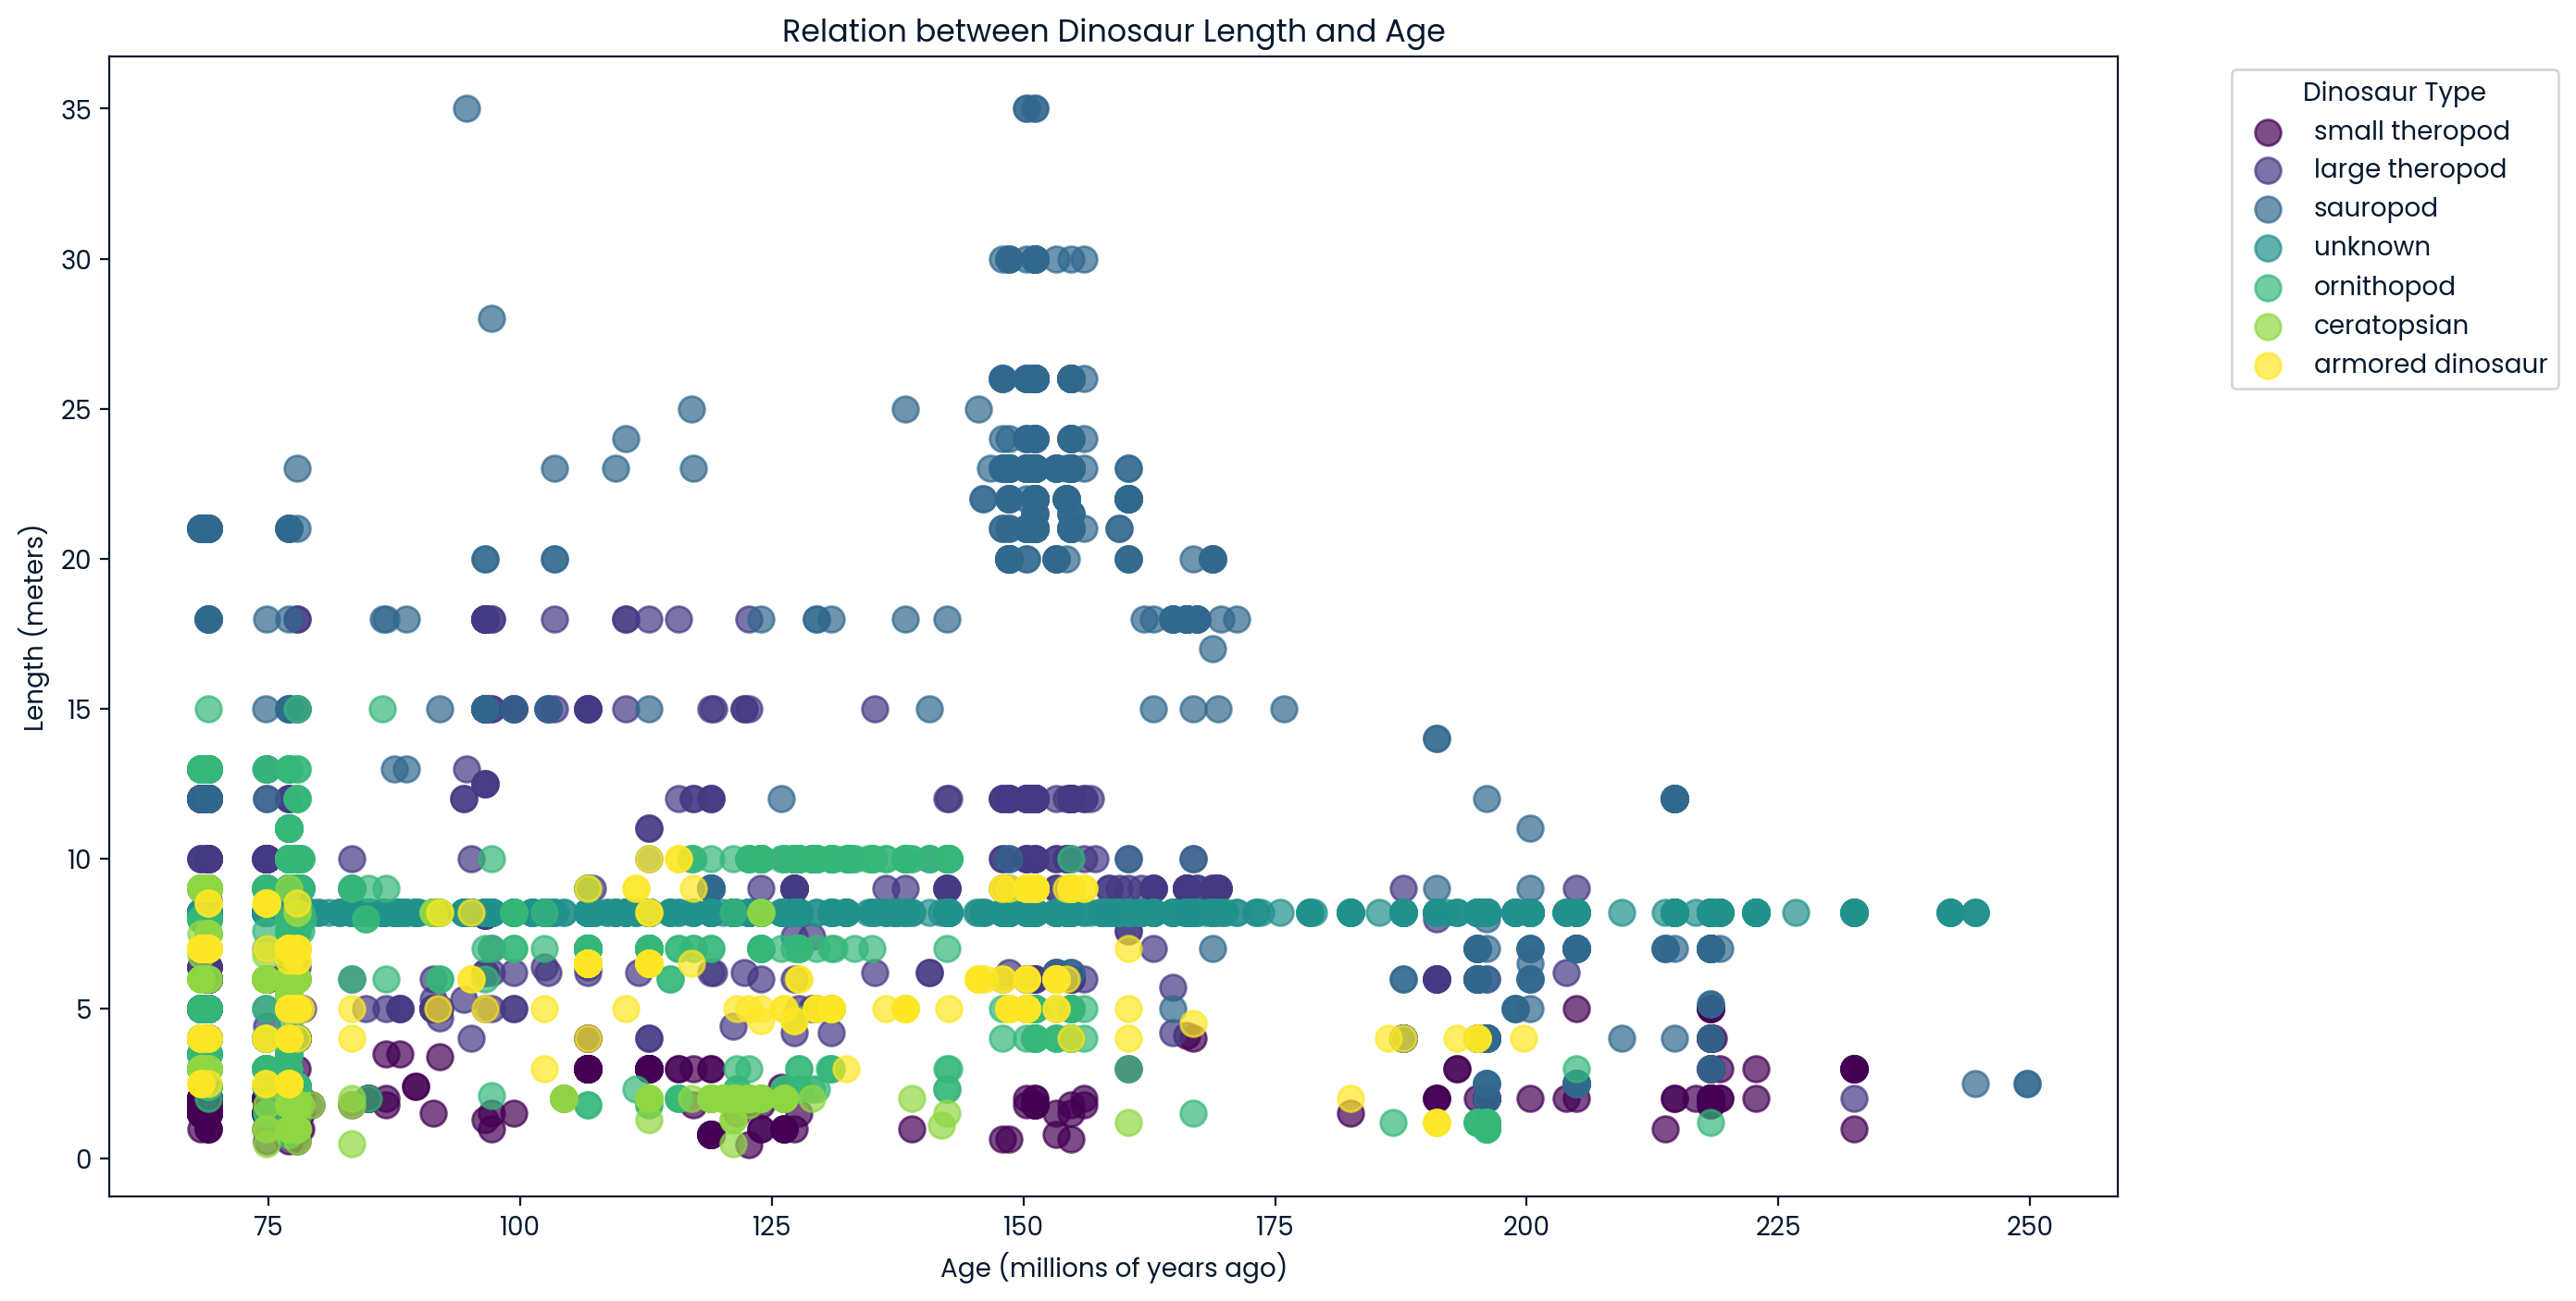

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the midpoint of the age range for each dinosaur
ds['mid_ma'] = (ds['max_ma'] + ds['min_ma']) / 2

# Create a scatter plot to show the relationship between dinosaur length and their age
plt.figure(figsize=(14, 8))

# Define colors for each dinosaur type
types = ds['type'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(types)))
color_dict = dict(zip(types, colors))

# Plot each type with a different color
for t in types:
    subset = ds[ds['type'] == t]
    plt.scatter(subset['mid_ma'], subset['length_m'], label=t, color=color_dict[t], s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Age (millions of years ago)')
plt.ylabel('Length (meters)')
plt.title('Relation between Dinosaur Length and Age')
plt.legend(title='Dinosaur Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

As illustrated in the scatter plot, it is primarily the sauropod dinosaurs that exhibited significant growth over time. The other dinosaur types did not show substantial growth.

However, even though we can observe some patterns in our dataset, it is still somewhat crowded, making it difficult to properly visualize and infer. The overcrowding prevents us from seeing all the points clearly. To address this issue, we can add some random noise to both the x and y axes to highlight regions of high density, a technique referred to as "jittering."

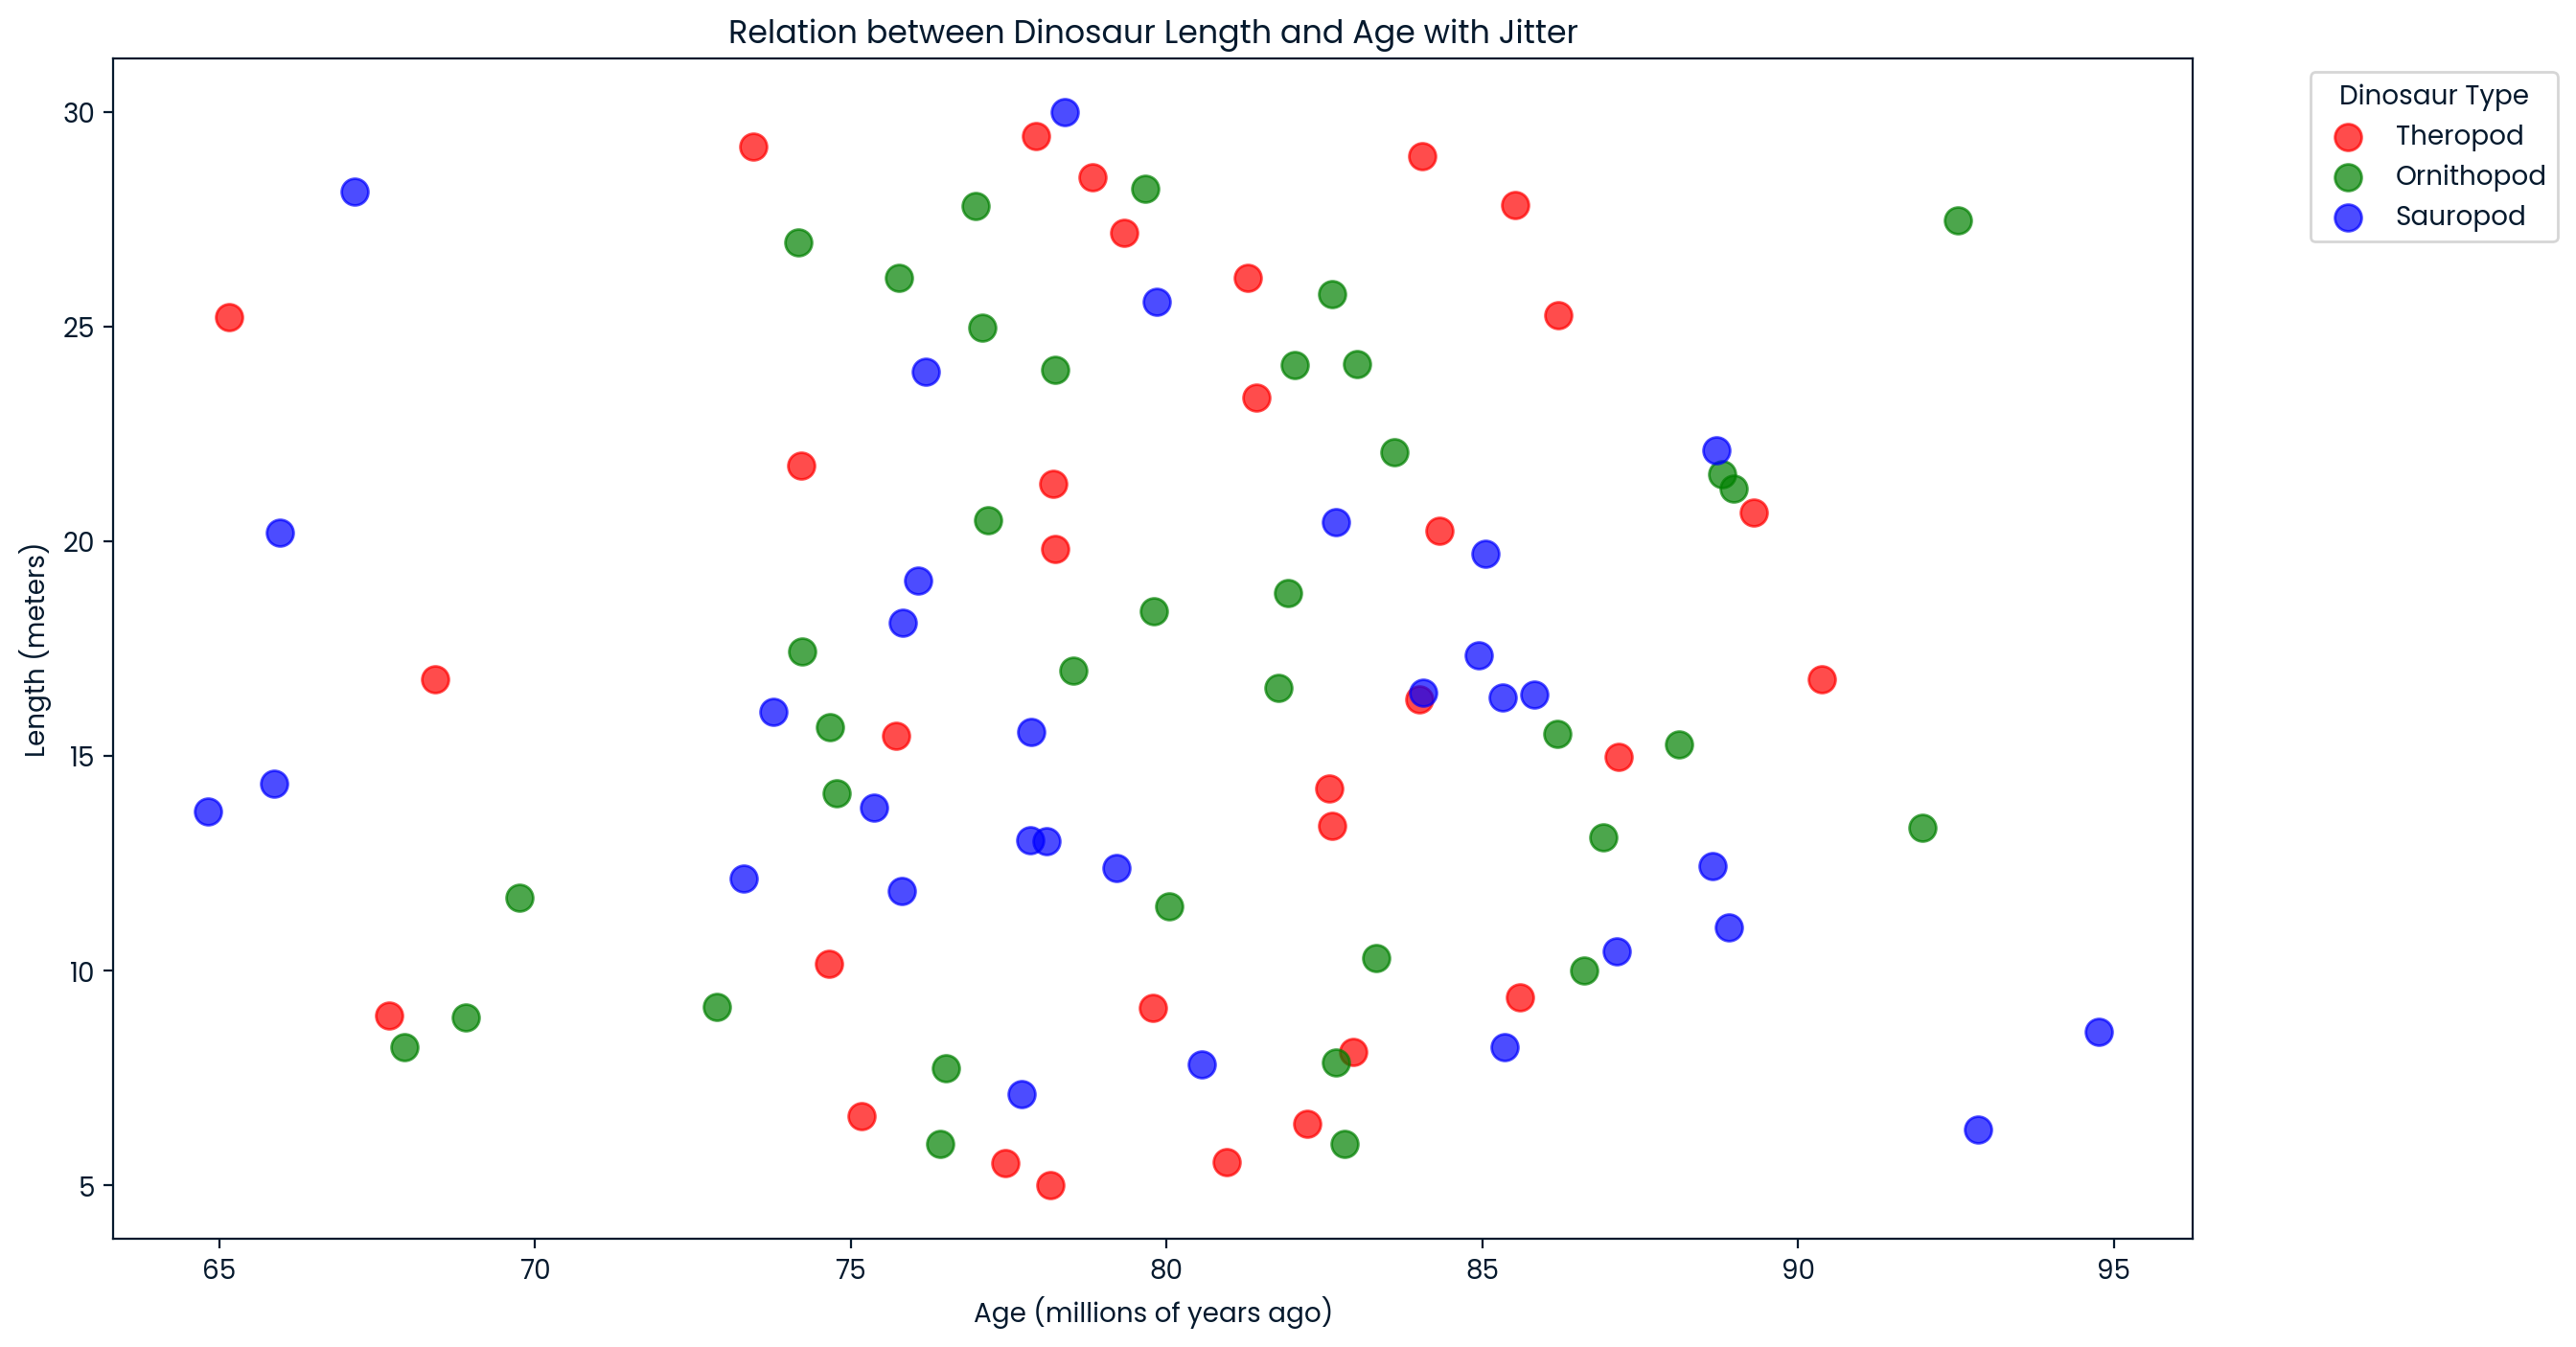

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration purposes
ds = {
    'max_ma': np.random.uniform(65, 100, 100),
    'min_ma': np.random.uniform(60, 95, 100),
    'length_m': np.random.uniform(5, 30, 100),
    'type': np.random.choice(['Theropod', 'Sauropod', 'Ornithopod'], 100)
}
ds = pd.DataFrame(ds)

# Define types and color_dict
types = ds['type'].unique()
color_dict = {'Theropod': 'red', 'Sauropod': 'blue', 'Ornithopod': 'green'}

ds['mid_ma'] = (ds['max_ma'] + ds['min_ma']) / 2
# Add random noise (jitter) to the data
np.random.seed(42)  # For reproducibility
jitter_strength = 0.5
ds['mid_ma_jitter'] = ds['mid_ma'] + np.random.normal(0, jitter_strength, size=len(ds))
ds['length_m_jitter'] = ds['length_m'] + np.random.normal(0, jitter_strength, size=len(ds))

# Create a scatter plot with jittered data
plt.figure(figsize=(14, 8))

# Plot each type with a different color
for t in types:
    subset = ds[ds['type'] == t]
    plt.scatter(subset['mid_ma_jitter'], subset['length_m_jitter'], label=t, color=color_dict[t], s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Age (millions of years ago)')
plt.ylabel('Length (meters)')
plt.title('Relation between Dinosaur Length and Age with Jitter')
plt.legend(title='Dinosaur Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The scatterplot visualizes the relationship between the length of dinosaurs (in meters) and their age (in millions of years ago) with added jitter to reduce overlap and improve clarity. 

#### Key Observations:
   - **Theropods** (Red): These dinosaurs are scattered across the plot, indicating a wide range of lengths and ages.
   - **Sauropods** (Blue): These tend to be among the longest dinosaurs, with lengths often exceeding those of other types.
   - **Ornithopods** (Green): These dinosaurs show a moderate range of lengths and ages.

The data points are spread across this axis, showing that the dataset includes dinosaurs from various geological periods.Moreover, There is a noticeable variation in lengths, with some dinosaurs being significantly longer than others.

The scatterplot hepls in demonstrating the diversity in dinosaur lengths and ages, with clear distinctions between different types of dinosaurs. AS observed, the use of jitter and color-coding enhances the readability and interpretability of the data.

5. Use the AI assitant to create an interactive map showing each record.

In [ ]:
import folium

# Define colors for each type - you might need to adjust these based on your dataset
type_colors = {
    'Theropod': 'red',
    'Sauropod': 'green',
    'Ornithischian': 'blue',
    # Add more types as needed
}

# Define marker icons for each class - adjust or add more as needed
class_icons = {
    'Saurischia': 'info-sign',
    'Ornithischia': 'leaf',
    # Add more classes as needed
}

# Create a map centered at an average location
map_center = [ds['lat'].mean(), ds['lng'].mean()]
dino_map = folium.Map(location=map_center, zoom_start=2)

# Add markers for each dinosaur record
for _, row in ds.iterrows():
    # Get color and icon for each row
    marker_color = type_colors.get(row['type'], 'gray')  # Default to gray if type not found
    marker_icon = class_icons.get(row['class'], 'question-sign')  # Default to question-sign if class not found
    
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['name']}, Type: {row['type']}, Length: {row['length_m']}m",
        tooltip=row['name'],
        icon=folium.Icon(color=marker_color, icon=marker_icon)
    ).add_to(dino_map)

# Display the map
dino_map

6. Other Onsights?

6.1 What are the top 5 region where most dinosaur fossils found?

In [24]:
# Grouping by region and counting the number of occurrences in each region
region_counts = ds.groupby('region').size().reset_index(name='count')

# Sorting the regions by count in descending order and get the top 5 regions
top_5_regions = region_counts.sort_values(by='count', ascending=False).head(5)

# Displaying the top 5 regions with the most dinosaur fossils
top_5_regions

,region,count
9,Alberta,650
278,Wyoming,514
167,Montana,445
65,England,211
195,Omnogov,206


6.2 What was the average lifespan of dinosaurs?

In [25]:
# Calculating the average lifespan of dinosaurs
# The lifespan can be estimated as the difference between max_ma and min_ma

# Adding a new column 'lifespan' to the dataset
ds['lifespan'] = ds['max_ma'] - ds['min_ma']

# Calculating the average lifespan
average_lifespan = ds['lifespan'].mean()

# Displaying the average lifespan
print("average lifespan : ",average_lifespan)

average lifespan :  10.896206826903656


## **Inference**

Regarding the dataset's quality, several missing entries were identified, particularly in the columns for dinosaur type, family, length, and diet. These incomplete entries significantly impact our analysis, as they constitute a substantial portion of the dataset (approximately 1,400 entries). Consequently, this hinders our ability to perform the most accurate analysis. It is imperative that these missing values be populated accurately and promptly to enhance the dataset's reliability and the validity of our findings.